<a href="https://colab.research.google.com/github/Praneetb2929/AiMl-ElevateLab-1/blob/main/Task1Data_Cleaning_%26_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the **dataset**

In [6]:
df = pd.read_csv("Titanic-Dataset.csv")

# Explore basic info

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# **Handle missing values**

In [11]:
# Separate numerical and categorical columns

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


In [13]:
# Numerical → median

In [14]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [15]:
# Categorical → mode

In [16]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [17]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# **Encode categorical columns**

In [18]:
# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,47,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,47,2


# **Scale/Normalize numerical features**

In [22]:
# Use StandardScaler:

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [25]:
df.describe()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,8.910000e+02,891.000000,891.000000
mean,6.379733e-17,3.987333e-17,-8.772133e-17,445.000000,0.647587,2.272780e-16,4.386066e-17,5.382900e-17,338.528620,3.987333e-18,53.639731,1.536476
std,1.000562e+00,1.000562e+00,1.000562e+00,257.353842,0.477990,1.000562e+00,1.000562e+00,1.000562e+00,200.850657,1.000562e+00,23.568293,0.791503
min,-1.730108e+00,-7.892723e-01,-1.566107e+00,0.000000,0.000000,-2.224156e+00,-4.745452e-01,-4.736736e-01,0.000000,-6.484217e-01,0.000000,0.000000
25%,-8.650540e-01,-7.892723e-01,-3.693648e-01,222.500000,0.000000,-5.657365e-01,-4.745452e-01,-4.736736e-01,158.500000,-4.891482e-01,47.000000,1.000000
50%,0.000000e+00,-7.892723e-01,8.273772e-01,445.000000,1.000000,-1.046374e-01,-4.745452e-01,-4.736736e-01,337.000000,-3.573909e-01,47.000000,2.000000
75%,8.650540e-01,1.266990e+00,8.273772e-01,667.500000,1.000000,4.333115e-01,4.327934e-01,-4.736736e-01,519.500000,-2.424635e-02,47.000000,2.000000
max,1.730108e+00,1.266990e+00,8.273772e-01,890.000000,1.000000,3.891554e+00,6.784163e+00,6.974147e+00,680.000000,9.667167e+00,146.000000,2.000000


# **Visualize outliers**

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

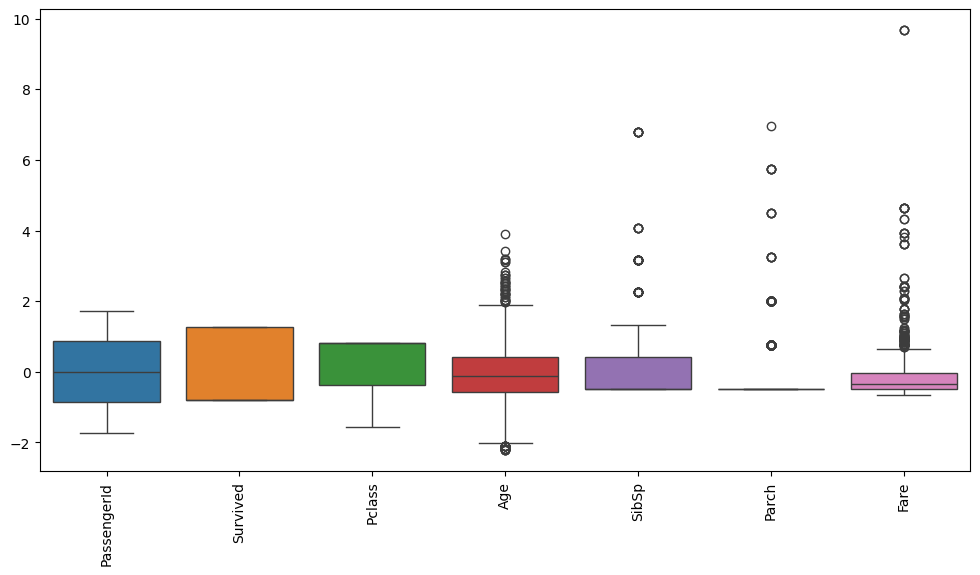

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.show()

# **Remove outliers using IQR**

In [28]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [29]:
df.shape


(577, 12)

In [30]:
df.to_csv("cleaned_data.csv", index=False)
